# DAY32

我们已经掌握了相当多的机器学习和python基础知识，现在面对一个全新的官方库，看看是否可以借助官方文档的写法了解其如何使用。

我们以pdpbox这个机器学习解释性库来介绍如何使用官方文档。

大多数 Python 库都会有官方文档，里面包含了函数的详细说明、用法示例以及版本兼容性信息。

通常查询方式包含以下2种：

1. GitHub 仓库：https://github.com/SauceCat/PDPbox
2. PyPI 页面：https://pypi.org/project/PDPbox/
3. 官方文档：https://pdpbox.readthedocs.io/en/latest/

一般通过github仓库都可以找到对应的官方文档那个。

-在官方文档中搜索函数名，然后查看函数的详细说明和用法示例



In [8]:
# pip install pdpbox scikit-learn pandas plotly
# pip install pdpbox --upgrade  # 升级pdpbox

下面以鸢尾花三分类项目来演示如何查看官方文档

In [9]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [10]:
# 加载鸢尾花数据集
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target  # 添加目标列（0-2类：山鸢尾、杂色鸢尾、维吉尼亚鸢尾）

# 特征与目标变量
features = iris.feature_names  # 4个特征：花萼长度、花萼宽度、花瓣长度、花瓣宽度
target = 'target'  # 目标列名

In [11]:
# 划分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[target], test_size=0.2, random_state=42
)

# 训练模型
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

此时模型已经建模完毕，这是一个经典的三分类项目，之前在基础班的项目三提到过sklearn提供的示例数据集，不了解的同学自行百度了解下该数据。

现在我们开始对这个模型进行解释性分析

先进入官方文档  https://pdpbox.readthedocs.io/en/latest/
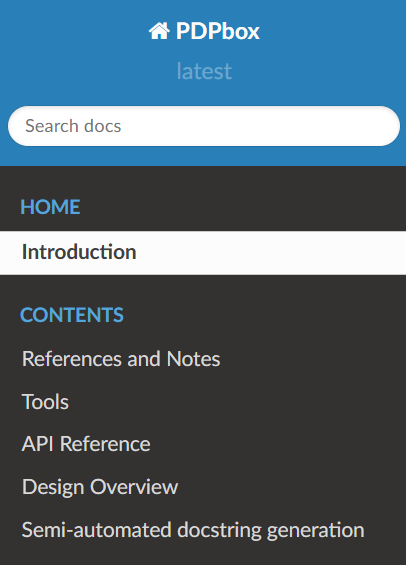

在官方文档中，通常会有一个“API Reference”或“Documentation”部分，列出所有可用的函数、类和方法。


pdpbox这个库比较小，所以非常适合我们学习用法，如果你英语比较差的话，推荐你去应用商店安装一个免费网页翻译插件

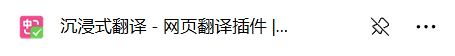

[插件地址](https://microsoftedge.microsoft.com/addons/detail/%E6%B2%89%E6%B5%B8%E5%BC%8F%E7%BF%BB%E8%AF%91-%E7%BD%91%E9%A1%B5%E7%BF%BB%E8%AF%91%E6%8F%92%E4%BB%B6-pdf%E7%BF%BB%E8%AF%91-/amkbmndfnliijdhojkpoglbnaaahippg)

我们选择第一个图来进行绘制

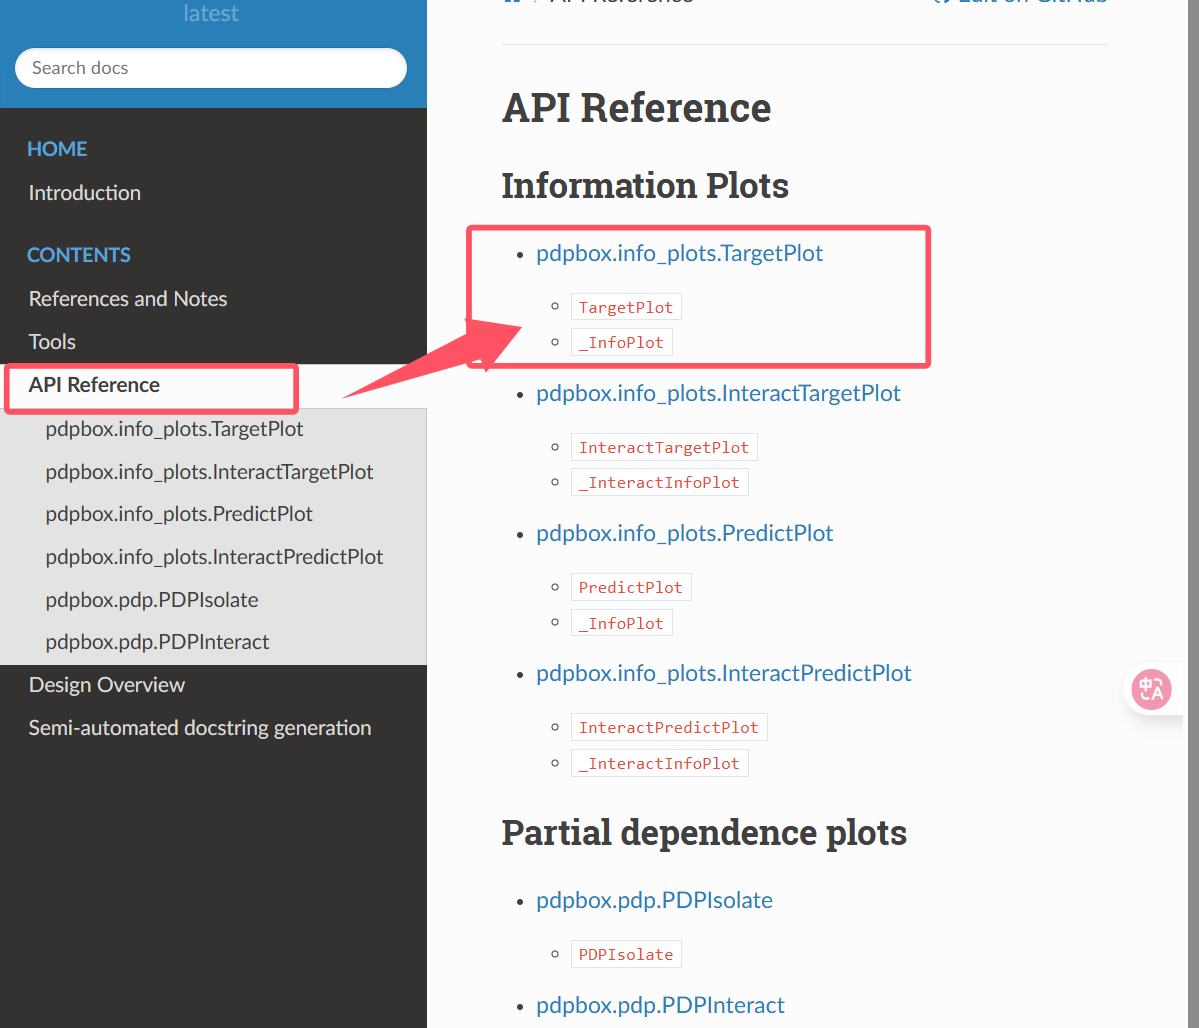

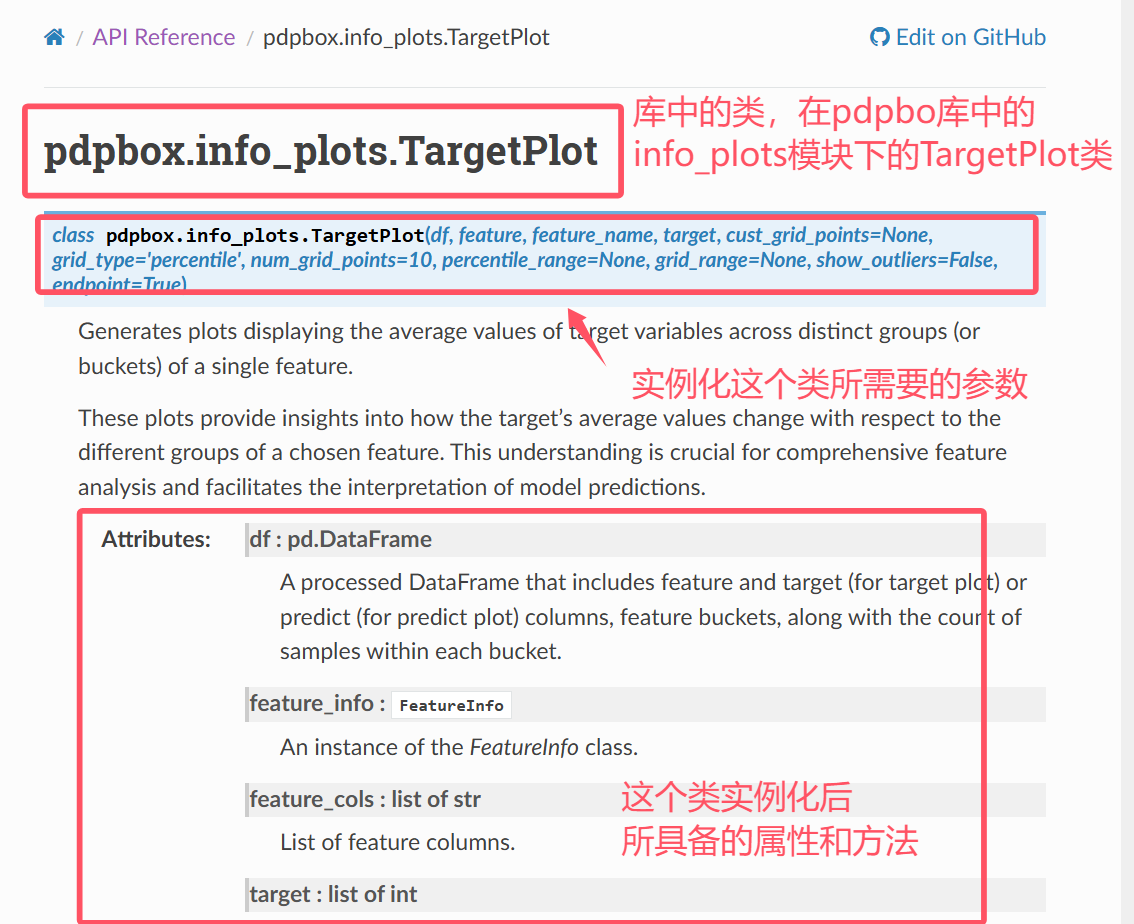

我的经典如下：
1. 库的官方文档是用来知道这个库有什么方法的
2. python文件中悬停功能是用来查看这个方法如何用的（也要搭配官方文档的说明）

现在我们第一步是实例化这个类，TargetPlot类

1. 先导入这个类（三种不同的导入和引用方法）
2. 传入实例化参数

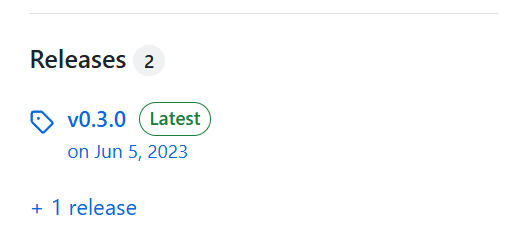


In [12]:
# 首先要确保库的版本是最新的，因为我们看的是最新的文档，库的版本可以在github上查看
import  pdpbox
print(pdpbox.__version__)  # pdpbox版本

0.3.0


In [13]:
# 导入这个类
from pdpbox.info_plots import TargetPlot  # 导入TargetPlot类

可以鼠标悬停在这个类上，来查看定义这个类所需要的参数，以及每个参数的格式

ctrl进入可以查看这个类的详细信息

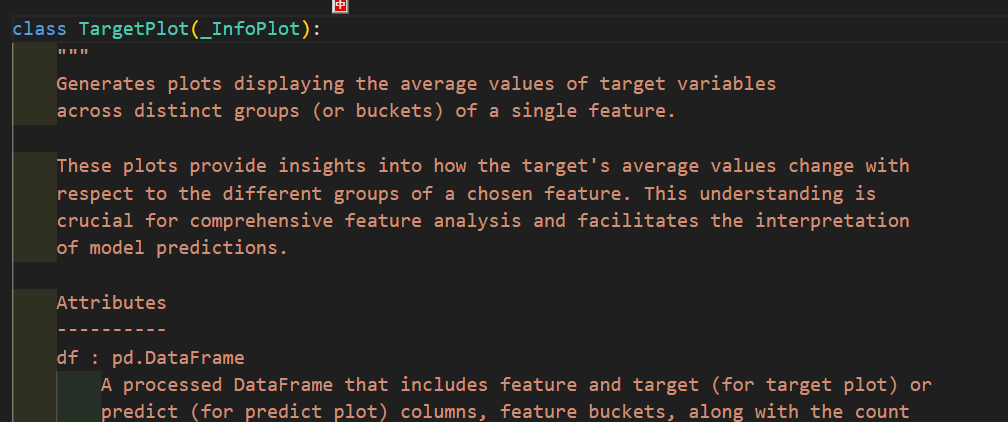

只能查看到他的初始化方法，但是无法看到他的普通方法。注意到提示我们有plot方法，但是看不到普通方法需要传入的参数

可以发现这个类继承了_InfoPlot类，此时我们再次进入_InfoPlot类里面，可以找到这个继承的plot方法

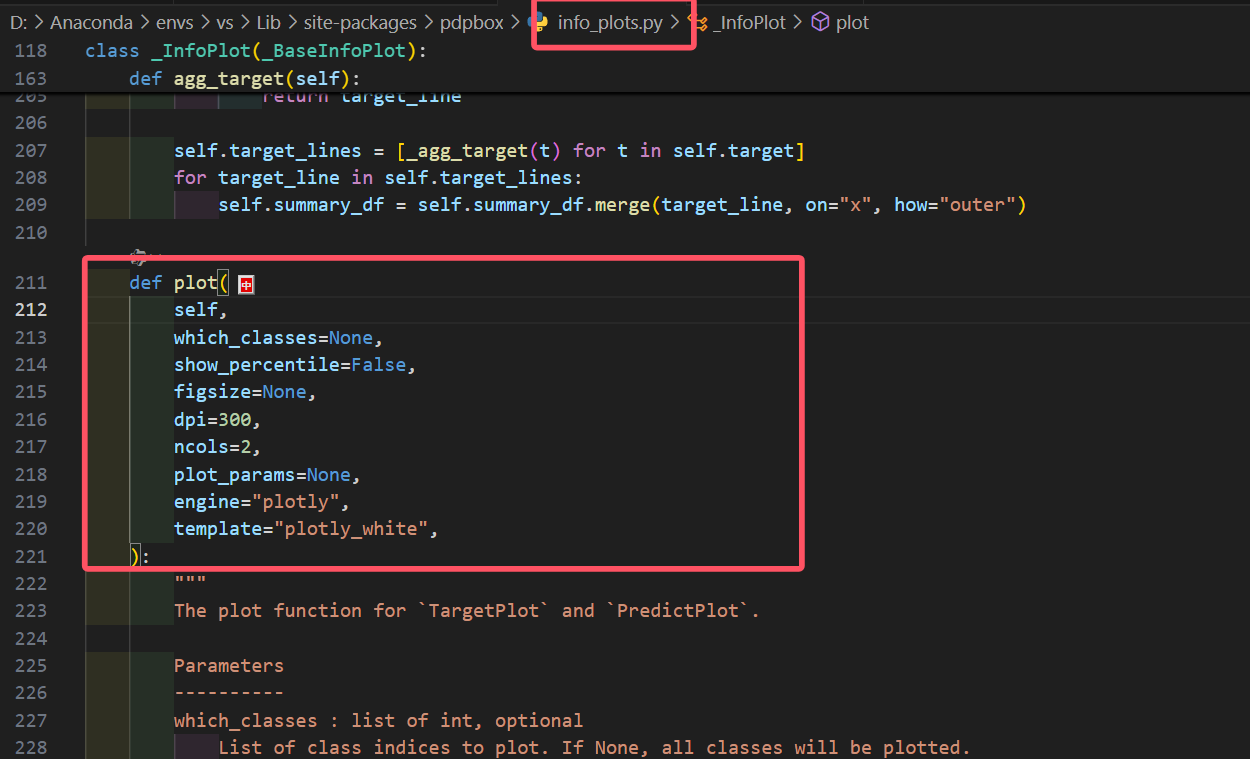

In [14]:
# 选择待分析的特征（如：petal length (cm)）
feature = 'petal length (cm)'
feature_name = feature  # 特征显示名称

In [17]:
# 选择待分析的特征（如：petal length (cm)）
feature = 'petal length (cm)'
feature_name = feature  # 特征显示名称

# 初始化TargetPlot对象（移除plot_type参数）
target_plot = TargetPlot(
    df=df,  # 原始数据（需包含特征和目标列）
    feature=feature,  # 目标特征列
    feature_name=feature_name,  # 特征名称（用于绘图标签）
    # target='target',  # 多分类目标索引（鸢尾花3个类别）
    target='target',  # 多分类目标索引（鸢尾花3个类别）
    grid_type='percentile',  # 分桶方式：百分位
    num_grid_points=10  # 划分为10个桶
)


d:\Anaconda\envs\vs\lib\site-packages\pdpbox\utils.py:215: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

d:\Anaconda\envs\vs\lib\site-packages\pdpbox\utils.py:221: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
# 调用plot方法绘制图形
target_plot.plot()

(Figure({
     'data': [{'hovertemplate': '%{text}',
               'marker': {'color': '#5BB573', 'opacity': 0.5},
               'name': 'count',
               'text': array([11., 13., 26., 16., 13., 20., 17., 15., 19.]),
               'textposition': 'outside',
               'type': 'bar',
               'width': 0.36,
               'x': array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
               'xaxis': 'x',
               'y': array([11, 13, 26, 16, 13, 20, 17, 15, 19], dtype=int64),
               'yaxis': 'y'},
              {'hovertemplate': '%{text}',
               'line': {'color': '#636EFA'},
               'marker': {'color': '#636EFA'},
               'mode': 'lines+markers+text',
               'name': 'Average target',
               'text': [0.0, 0.0, 0.0, 1.0, 1.0, 1.15, 1.765, 2.0, 2.0],
               'textposition': 'top center',
               'type': 'scatter',
               'x': array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
               'xaxis': '

In [ ]:
# 看起来很奇怪，我们查看下类型
type(target_plot.plot())

tuple

In [ ]:
len(target_plot.plot()) # 查看元组的形状，元组只有len方法，没有shape方法

3

我们来依次查看这个元组返回的究竟是什么内容？

In [23]:
target_plot.plot()[0]

In [25]:
target_plot.plot()[1]
# 居然什么也没有返回

In [26]:
type(target_plot.plot()[1]) 

NoneType

至于为什么是none类型，这是寄到plotly的底层，你可以和ai自行了解下

In [27]:
target_plot.plot()[2]

,x,value,percentile,count,target
0,0,"[1.0, 1.4)","[0.0, 11.11)",11,0.000000
1,1,"[1.4, 1.5)","[11.11, 22.22)",13,0.000000
2,2,"[1.5, 2.63)","[22.22, 33.33)",26,0.000000
3,3,"[2.63, 4.1)","[33.33, 44.44)",16,1.000000
4,4,"[4.1, 4.5)","[44.44, 55.56)",13,1.000000
5,5,"[4.5, 4.9)","[55.56, 66.67)",20,1.150000
6,6,"[4.9, 5.19)","[66.67, 77.78)",17,1.764706
7,7,"[5.19, 5.7)","[77.78, 88.89)",15,2.000000
8,8,"[5.7, 6.9]","[88.89, 100.0]",19,2.000000


这个返回的是目标变量（或预测值）在不同特征区间的统计摘要。这是 PDPbox（Partial Dependence Plot） 库生成的核心分析数据。他已经在图上被可视化出来了

实际上，返回一个三元组 (fig, axes, summary_df)，其中 fig 是 Plotly 的 Figure 对象。要查看或修改图形的形状（如宽度、高度、边距等），可以直接操作这个 Figure 对象。

在官方文档介绍中的plot方法最下面，写明了参数和对应的返回值

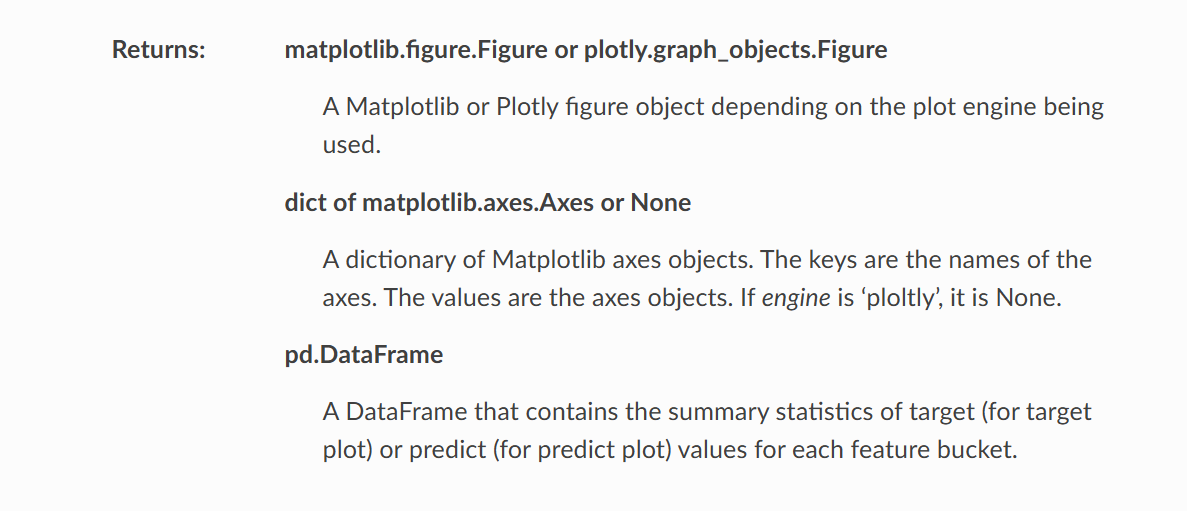

综上需要注意，我们关注一个类需要关注如下信息
1. 传入的参数和对应的格式
2. 类对应的方法的返回值

最后，我们用规范的形式来完成

In [28]:
fig, axes, summary_df = target_plot.plot(
    which_classes=None,  # 绘制所有类别（0,1,2）
    show_percentile=True,  # 显示百分位线
    engine='plotly',
    template='plotly_white'
)

# 手动设置图表尺寸（单位：像素）
fig.update_layout(
    width=800,  # 宽度800像素
    height=500,  # 高度500像素
    title=dict(text=f'Target Plot: {feature_name}', x=0.5)  # 居中标题
)

fig.show()

其中，fig.update_layout() 是对 Plotly 图表进行 二次修改 的核心方法。很多绘图工具都是调用的底层的绘图包，所以要想绘制出想要的图表，需要先了解底层绘图包的语法。

这里暂且不做阐述，有兴趣自行了解